tensor(0.0003)
tensor([-2.3949e-04, -2.4853e-04,  8.4686e-05,  ..., -4.4709e-04,
        -3.1447e-04, -4.5475e-04])
tensor([1.0000e-05, 1.0000e-05])


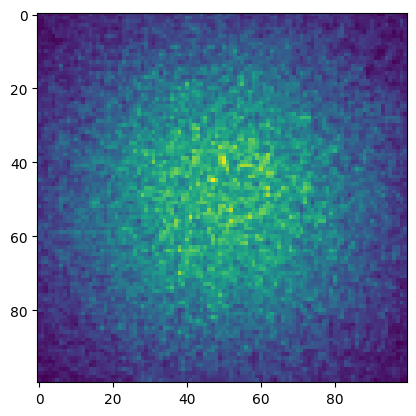

In [ ]:
from cheetah.particles import ParticleBeam
from cheetah.accelerator import Drift, Quadrupole, Segment, Screen
import torch
import numpy as np
import matplotlib.pyplot as plt

twiss_params = {
    'energy': torch.tensor(1e9),
    'emittance_x': torch.tensor(5e-8),
    'emittance_y': torch.tensor(5e-8),
    'beta_x': torch.tensor(1.0),
    'alpha_x': torch.tensor(0.0),
    'beta_y': torch.tensor(1.0),
    'alpha_y': torch.tensor(0.0),
    'total_charge': torch.tensor(1e-9),
}

sim_cheetah_beam = ParticleBeam.from_twiss(**twiss_params)

screen = Screen(
    name='OTRS2', 
    resolution=(100, 100), 
    pixel_size=torch.ones(2) * (10e-6), 
    is_active=True,
    method='kde', 
    kde_bandwidth=torch.tensor(10e-6/2)
)

sim_beamline = Segment([
    Drift(length=torch.tensor(1.0)),
    screen
])

tracked = sim_beamline.track(sim_cheetah_beam)

print(tracked.sigma_x)
print(sim_beamline.OTRS2.get_read_beam().x)
print(sim_beamline.OTRS2.pixel_size)

plt.imshow(sim_beamline.OTRS2.reading)
plt.show()


In [27]:
sim_beamline.OTRS2.reading.shape

torch.Size([100, 100])

In [31]:
torch.tensor((2,2,2)).shape

torch.Size([3])